## Week 4: Customer Segmentation using K-Means Clustering 
- Objective: Use unsupervised learning to segment customers into different groups based on purchasing behaviors. 
- Skills: K-Means Clustering, Data Preprocessing, Cluster Analysis. 

# 1. Data Preprocessing

#### Import Libraries:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Load and Inspect Data:

In [33]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


#### Handle Missing Values:

In [34]:
print(df.isnull().sum())  # Check for missing data
df.drop("CustomerID", axis=1, inplace=True)  # Drop irrelevant column

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#### Encode Categorical Variables:

In [35]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

#### Feature Scaling:

In [37]:
scaler = StandardScaler()
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X_scaled = scaler.fit_transform(X)

# 2. Exploratory Data Analysis (EDA)

#### Distributions:

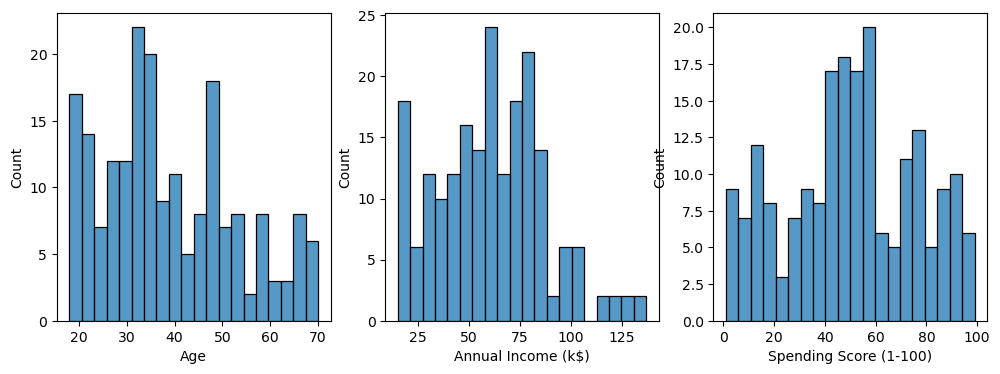

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df["Age"], bins=20)
plt.subplot(1, 3, 2)
sns.histplot(df["Annual Income (k$)"], bins=20)
plt.subplot(1, 3, 3)
sns.histplot(df["Spending Score (1-100)"], bins=20)
plt.show()

#### Correlation Analysis:

Text(0.5, 1.0, 'Correlation Matrix')

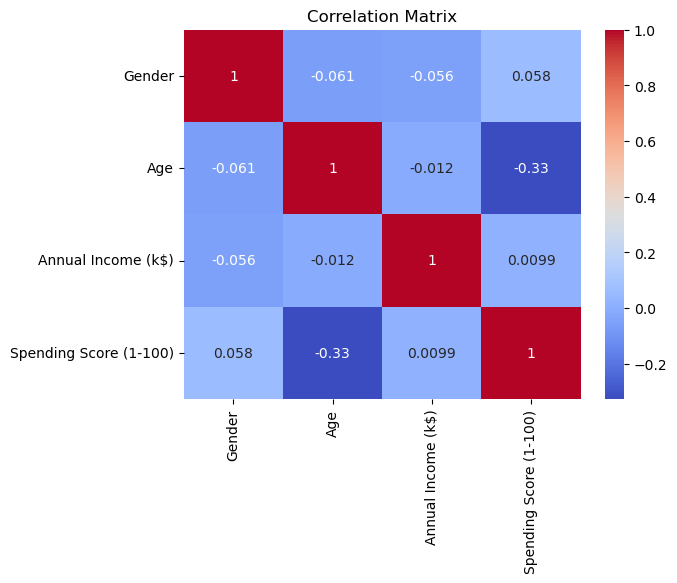

In [39]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

#### Income vs. Spending Score Scatter Plot:

Text(0.5, 1.0, 'Income vs. Spending Score')

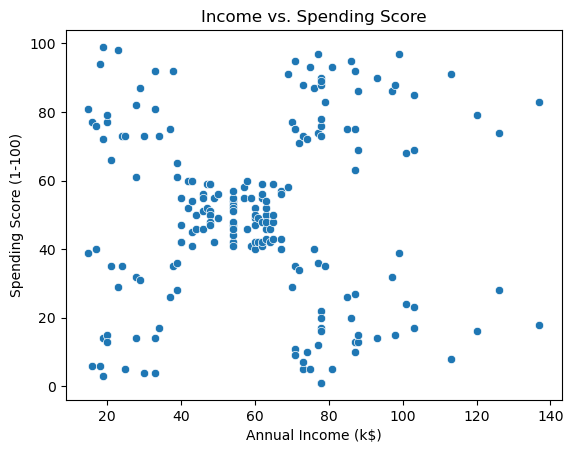

In [40]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Income vs. Spending Score")

# 3. K-Means Clustering

#### Apply K-Means with k=5:

In [43]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

#### Visualize Clusters:

Text(0.5, 1.0, 'Customer Clusters')

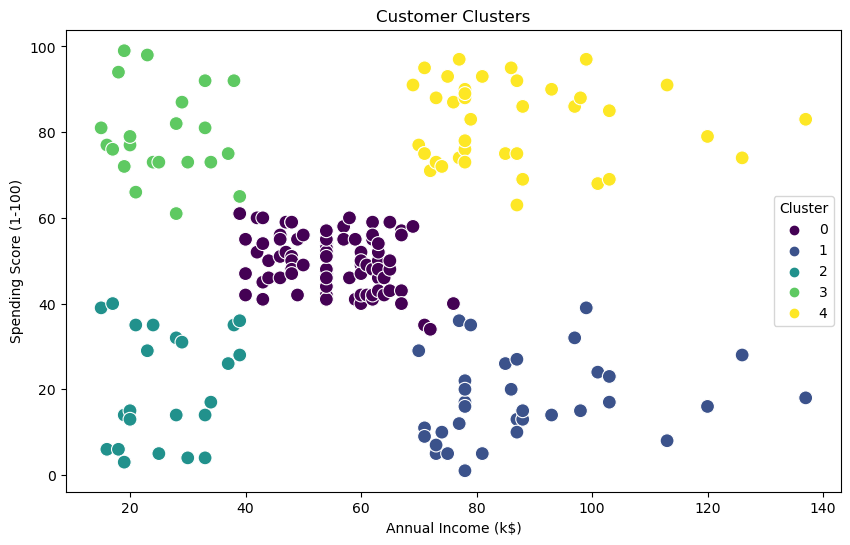

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", 
                hue="Cluster", palette="viridis", s=100)
plt.title("Customer Clusters")

# 4. Cluster Analysis

#### Cluster Characteristics:

In [45]:
cluster_summary = df.groupby("Cluster").agg({
    "Age": "mean",
    "Annual Income (k$)": "mean",
    "Spending Score (1-100)": "mean",
    "Gender": "mean"  # 1=Female, 0=Male
})
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)    Gender
Cluster                                                                 
0        42.716049           55.296296               49.518519  0.592593
1        41.114286           88.200000               17.114286  0.457143
2        45.217391           26.304348               20.913043  0.608696
3        25.272727           25.727273               79.363636  0.590909
4        32.692308           86.538462               82.128205  0.538462


#### Boxplots for Age/Income/Spending Distributions:

Text(0.5, 1.0, 'Income Distribution per Cluster')

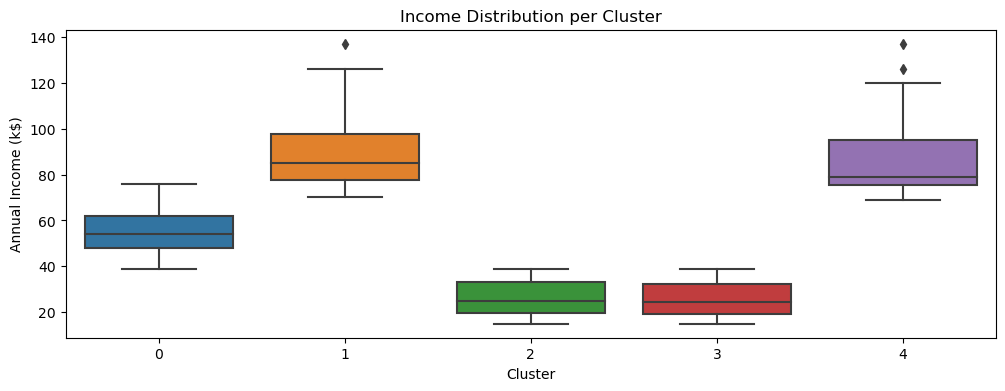

In [46]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="Cluster", y="Annual Income (k$)")
plt.title("Income Distribution per Cluster")

#### Gender Distribution:

Text(0, 0.5, 'Count')

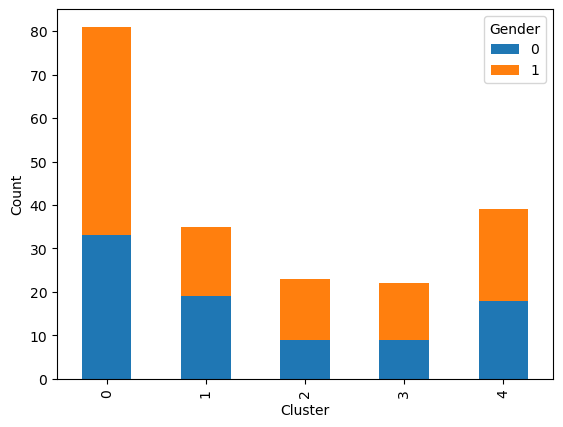

In [47]:
pd.crosstab(df["Cluster"], df["Gender"]).plot(kind="bar", stacked=True)
plt.xlabel("Cluster")
plt.ylabel("Count")